*Model Development - Laptop Pricing*

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('Data//laptop_pricing_dataset_mod2 (1).csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

1 Simple Linear Regression

In [5]:
# You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the 
# different features of the dataset. Create a single feature Linear Regression model that 
# fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df[['CPU_frequency']]
Y = df['Price']
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [6]:
Yhat = lm.predict(X)
Yhat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

C:\Users\chris\AppData\Local\Temp\ipykernel_17252\1492590016.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
C:\Users\chris\AppData\Local\Temp\ipykernel_17252\1492590016.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

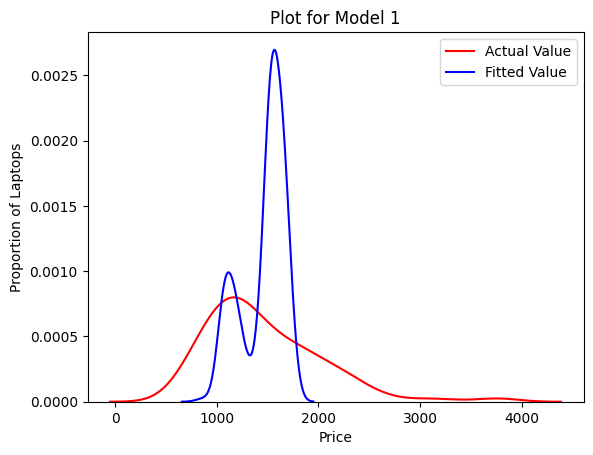

In [17]:
# Generate the Distribution plot for the predicted values and that of the actual values. 

import matplotlib.pyplot as plt
import seaborn as sns

ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Yhat, hist = False, color = 'b', label = 'Fitted Value', ax = ax1)

plt.title('Plot for Model 1')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value', 'Fitted Value'])
plt.show()

# How well did the model perform?

In [20]:
# Fine the R^2

from sklearn.metrics import mean_squared_error

mse_slr = mean_squared_error(Y, Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


2 Multiple Linear Regression

In [21]:
# The parameters which have a low enough p-value so as to indicate strong relationship 
# with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' 
# and 'Category'. Use all these variables to create a Multiple Linear Regression system.

lm2 = LinearRegression()
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]

lm2.fit(Z, Y)

LinearRegression()

In [22]:
Yhat2 = lm2.predict(Z)
Yhat2[0:5]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022])

C:\Users\chris\AppData\Local\Temp\ipykernel_17252\2004160589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Price')
C:\Users\chris\AppData\Local\Temp\ipykernel_17252\2004160589.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

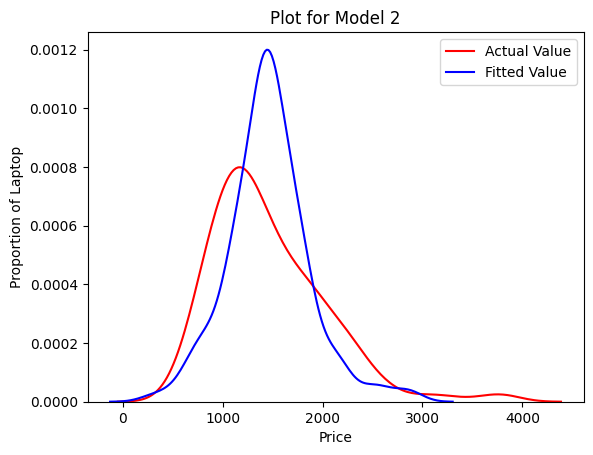

In [16]:
ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Price')
sns.distplot(Yhat2, hist = False, color = 'b', label = 'Fitted Price', ax = ax1)

plt.title('Plot for Model 2')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptop')
plt.legend(['Actual Value', 'Fitted Value'])
plt.show()

In [23]:
# Fine the R^2

mse_slr2 = mean_squared_error(df['Price'], Yhat2)
r2_score_slr2 = lm2.score(Z, Y)
print('The R-square for Linear Regression is: ', r2_score_slr2)
print('The mean square error of price and predicted value is: ', mse_slr2)

The R-square for Linear Regression is:  0.5082509055187376
The mean square error of price and predicted value is:  161680.57263893104


3 Polynomial Regression

In [25]:
# Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial 
# degrees. Remember that polynomial fits are done using numpy.polyfit.

X3 = df[['CPU_frequency']]
X3 = X3.to_numpy().flatten()

f3 = np.polyfit(X3, Y, 3)
p3 = np.poly1d(f3)

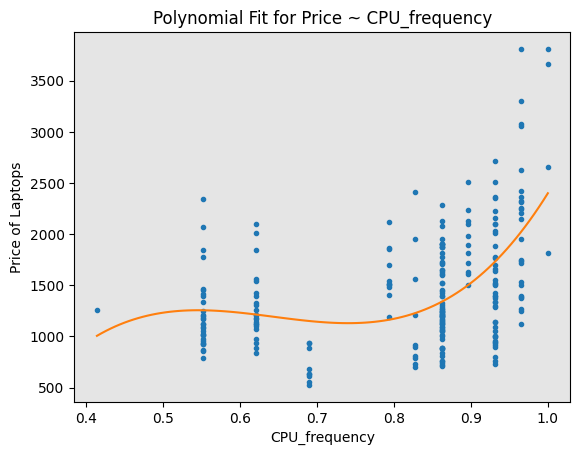

In [27]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Laptops')

PlotPolly(p3, X3, Y, 'CPU_frequency')

In [34]:
# Fine the R^2 for polynomial

from sklearn.metrics import r2_score

mse3 = mean_squared_error(Y,p3(X))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mse3)

The R-square value for 3rd degree polynomial is:  0.2669264079653113
The MSE value for 3rd degree polynomial is:  241024.86303848765


4 Pipeline - Polynomial Multiple Regression

In [33]:
Input=[('scale',StandardScaler()), 
       ('polynomial', PolynomialFeatures(include_bias=False)), 
       ('model',LinearRegression())]

pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [38]:
mse4 = mean_squared_error(Y,ypipe)
r_squared_4 = r2_score(Y, ypipe)
print('The R-square value for 3rd degree polynomial is: ', r_squared_4)
print('The MSE value for 3rd degree polynomial is: ', mse4)

The R-square value for 3rd degree polynomial is:  0.6332096172725036
The MSE value for 3rd degree polynomial is:  120595.80746232362


C:\Users\chris\AppData\Local\Temp\ipykernel_17252\3960078588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax4 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Price')
C:\Users\chris\AppData\Local\Temp\ipykernel_17252\3960078588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

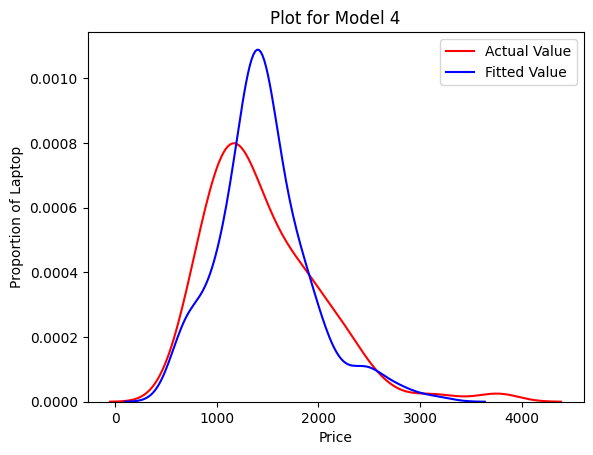

In [39]:
ax4 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Price')
sns.distplot(ypipe, hist = False, color = 'b', label = 'Fitted Price', ax = ax4)

plt.title('Plot for Model 4')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptop')
plt.legend(['Actual Value', 'Fitted Value'])
plt.show()